In [130]:
import pandas as pd
import pytrends
from pytrends.request import TrendReq
pytrend = TrendReq()
from string import ascii_uppercase
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import seaborn as sns


In [133]:
SearchTerms = ['Fast Fashion', 'Sustainable Fashion', 'Missguided', 'Greenwashing']
SearchTerms_CODES = [pytrend.suggestions(keyword=i)[0] for i in SearchTerms]
df_CODES = pd.DataFrame(SearchTerms_CODES)
df_CODES

,mid,title,type
0,/m/04y5l_6,Fast fashion,Topic
1,/m/02x01t8,Sustainable fashion,Topic
2,/g/11c3ywbhfg,Missguided,Topic
3,/m/01w1qb,Greenwashing,Topic


In [134]:
Exact_SearchTerms=df_CODES['mid'].to_list()
DateRange='2017-01-01 2021-01-01' #the time range we are looking at
Category=185 # Indicates the category searched, 185 is Fashion
Search_type='' #default is 'web searches',others include 'images','news','youtube','froogle' (google shopping)

In [139]:
Individual_Exact_SearchTerm = list(zip(*[iter(Exact_SearchTerms)]*1))
Individual_Exact_SearchTerm = [list(x) for x in Individual_Exact_SearchTerm]
dicti = {}
i = 1
for Country in COUNTRY:
    for keyword in Individual_Exact_SearchTerm:
        pytrend.build_payload(kw_list=keyword,
                              timeframe = DateRange,
                              #geo = Country,
                              #cat=CATEGORY,
                              gprop=Search_type)
        dicti[i] = pytrend.interest_over_time()
        i+=1
df_trends = pd.concat(dicti, axis=1)

df_trends
#df_trends.to_csv('data/google_trends.csv', encoding='utf-8')



1                    2                       3            \
           /m/04y5l_6 isPartial /m/02x01t8 isPartial /g/11c3ywbhfg isPartial   
date                                                                           
2017-01-01         25     False         21     False            39     False   
2017-01-08         30     False         22     False            38     False   
2017-01-15         28     False         25     False            39     False   
2017-01-22         26     False         26     False            45     False   
2017-01-29         31     False         27     False            46     False   
...               ...       ...        ...       ...           ...       ...   
2020-11-29         93     False         67     False            40     False   
2020-12-06         77     False         64     False            38     False   
2020-12-13         71     False         61     False            39     False   
2020-12-20         51     False         51     False            30     False   
2020-12-27         59     False         62     False            38     False   

                   4            
           /m/01w1qb isPartial  
date                            
2017-01-01        22     False  
2017-01-08        28     False  
2017-01-15        33     False  
2017-01-22        34     False  
2017-01-29        31     False  
...              ...       ...  
2020-11-29        92     False  
2020-12-06        80     False  
2020-12-13        71     False  
2020-12-20        44     False  
2020-12-27        39     False  

[209 rows x 8 columns]

In [140]:
df_trends.columns = df_trends.columns.droplevel() #drop outside header
df_trends = df_trends.drop('isPartial', 1) #drop "isPartial"
df_trends.reset_index(level=0,inplace=True) #reset_index
df_trends.columns=['date','Fast Fashion', 'Sustainable Fashion','Missguided', 'Greenwashing'] #change column names
print(df_trends.columns)
print(df_trends.columns.shape)
df_trends

Index(['date', 'Fast Fashion', 'Sustainable Fashion', 'Missguided',
       'Greenwashing'],
      dtype='object')
(5,)


C:\Users\LMuka\AppData\Local\Temp\ipykernel_14160\3207901424.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_trends = df_trends.drop('isPartial', 1) #drop "isPartial"


,date,Fast Fashion,Sustainable Fashion,Missguided,Greenwashing
0,2017-01-01,25,21,39,22
1,2017-01-08,30,22,38,28
2,2017-01-15,28,25,39,33
3,2017-01-22,26,26,45,34
4,2017-01-29,31,27,46,31
...,...,...,...,...,...
204,2020-11-29,93,67,40,92
205,2020-12-06,77,64,38,80
206,2020-12-13,71,61,39,71
207,2020-12-20,51,51,30,44


<AxesSubplot:>

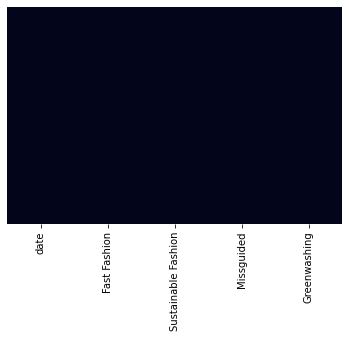

In [141]:
sns.heatmap(df_trends.isnull(),cbar=False,yticklabels=False) #shows no null values.

In [120]:

print(df_trends.describe())

       Fast Fashion  Sustainable Fashion  Missguided  Greenwashing
count    209.000000           209.000000  209.000000    209.000000
mean      50.612440            46.717703   42.526316     46.464115
std       18.672482            17.484106    9.695386     17.916202
min       22.000000            19.000000   22.000000     12.000000
25%       35.000000            32.000000   37.000000     34.000000
50%       46.000000            44.000000   41.000000     44.000000
75%       65.000000            61.000000   47.000000     60.000000
max      100.000000           100.000000  100.000000    100.000000


<AxesSubplot:>

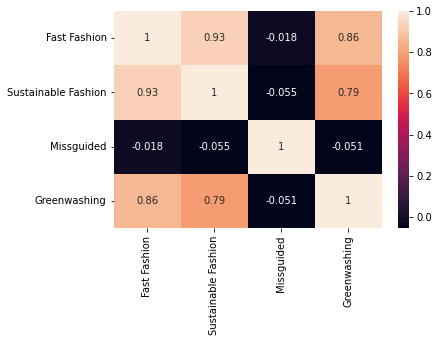

In [142]:
df_trends.corr()
plt.figure(figsize=(6,4))
sns.heatmap(df_trends.corr('pearson'),annot=True) 

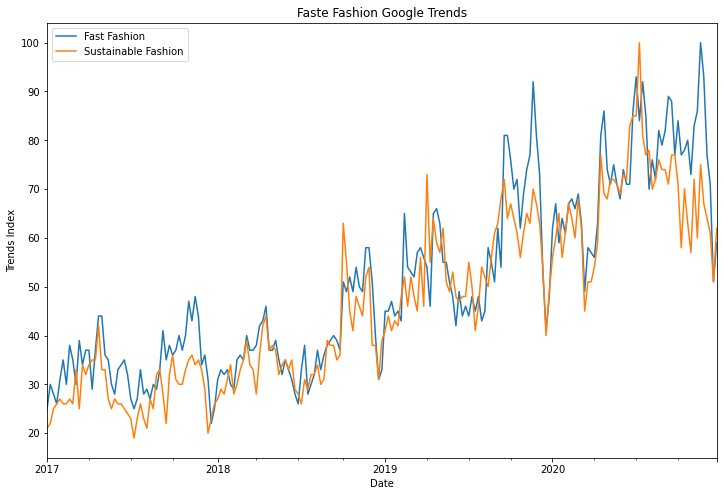

In [143]:
#sns.set(color_codes=True)
dx = df_trends.plot(figsize = (12,8),x="date", y=['Fast Fashion','Sustainable Fashion'], kind="line", title = "Faste Fashion Google Trends")
dx.set_xlabel('Date')
dx.set_xlabel('Date')
dx.set_ylabel('Trends Index')
dx.tick_params(axis='both', which='both', labelsize=10)






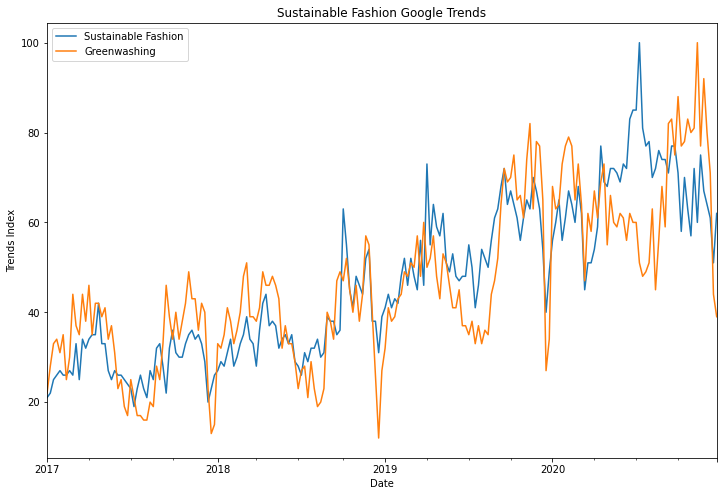

In [144]:
dx = df_trends.plot(figsize = (12,8),x="date", y=['Sustainable Fashion', 'Greenwashing'], kind="line", title = "Sustainable Fashion Google Trends")
dx.set_xlabel('Date')
dx.set_ylabel('Trends Index')
dx.tick_params(axis='both', which='both', labelsize=10)

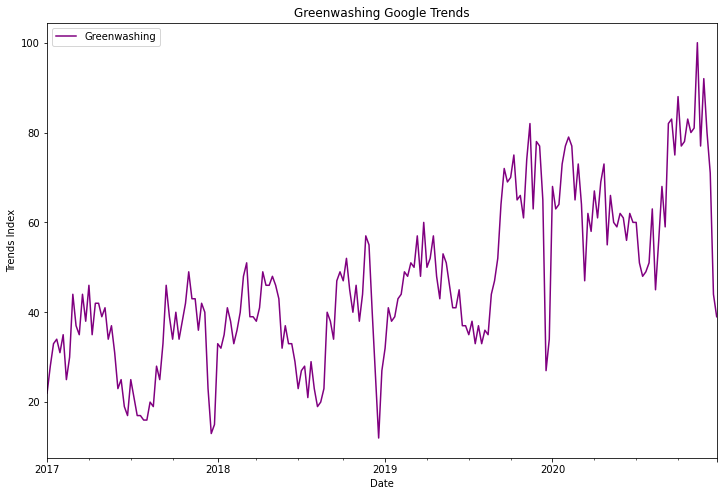

In [145]:
dx = df_trends.plot(figsize = (12,8),x="date", y=['Greenwashing'], kind="line", title = "Greenwashing Google Trends", color = 'purple')
dx.set_xlabel('Date')
dx.set_ylabel('Trends Index')
dx.tick_params(axis='both', which='both', labelsize=10)

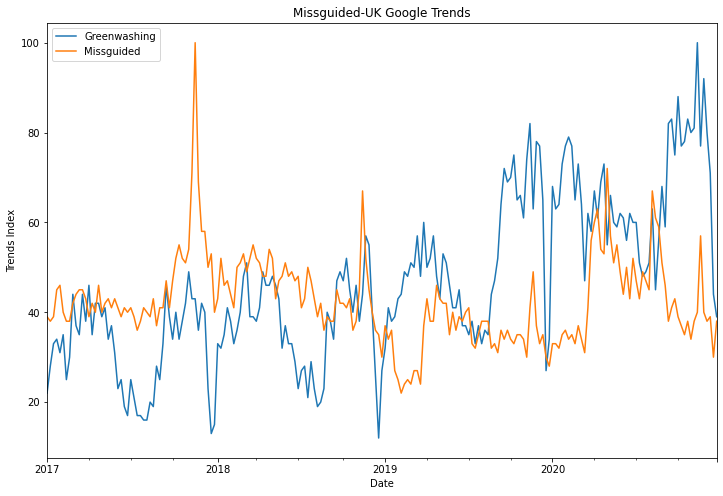

In [146]:
dx = df_trends.plot(figsize = (12,8),x="date", y=['Greenwashing','Missguided'], kind="line", title = "Missguided-UK Google Trends")
dx.set_xlabel('Date')
dx.set_ylabel('Trends Index')
dx.tick_params(axis='both', which='both', labelsize=10)